# BI - Lab 3 Task2: Predictive Analysis<br>Supervised Learning – Titanic
#### Abu Abdullah Dhrubo<br>*h21abudh@du.se*

This task is about classifying a large set of data based on a set of pre-classified samples.

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\abdul\\Documents\\Högskolan Dalarna\\1st Semester\\3. AMI23B Business Intelligence\\Lab\\3\\Lab3')
print("Directory updated")

Directory updated


In [2]:
#Import Libraries
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("importing packages - Successful")

importing packages - Successful


In [3]:
# Read Text Files with Pandas using read_csv()
import pandas as pd

# read text file into pandas DataFrame
df_train = pd.read_csv("C:/Users/abdul/Documents/Högskolan Dalarna/1st Semester/3. AMI23B Business Intelligence/Lab/3/Lab3/titanic_train.csv")
df_test = pd.read_csv("C:/Users/abdul/Documents/Högskolan Dalarna/1st Semester/3. AMI23B Business Intelligence/Lab/3/Lab3/titanic_test.csv")

# display DataFrame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
na_obs = pd.DataFrame({'na count': df_train.isnull().sum(), '% na': (df_train.isnull().sum()/891)*100})
na_obs

,na count,% na
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## Analysing the features

### Sex - Categorical Feature

In [5]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


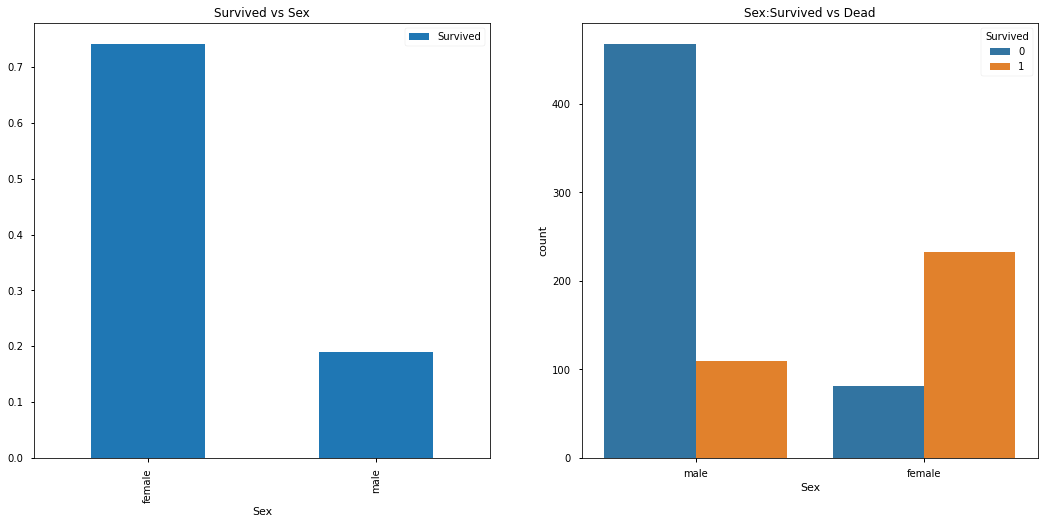

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This seems intriguing. The number of men on board much outnumbers the number of women. Despite this, the number of women saved is about twice that of men. Women on the ship have a survival rate of roughly 75 percent, whereas men have a rate of around 18-19 percent.

This appears to be a crucial trait for modeling. Is it, however, the best? Let's look at some more features.

This seems intriguing. The number of men on board much outnumbers the number of women. Despite this, the number of women saved is about twice that of men. Women on the ship have a survival rate of roughly 75 percent, whereas men have a rate of around 18-19 percent.

This appears to be a crucial trait for modeling. Is it, however, the best? Let's look at some more features.

## Pclass ---> Ordinal Feature

In [7]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


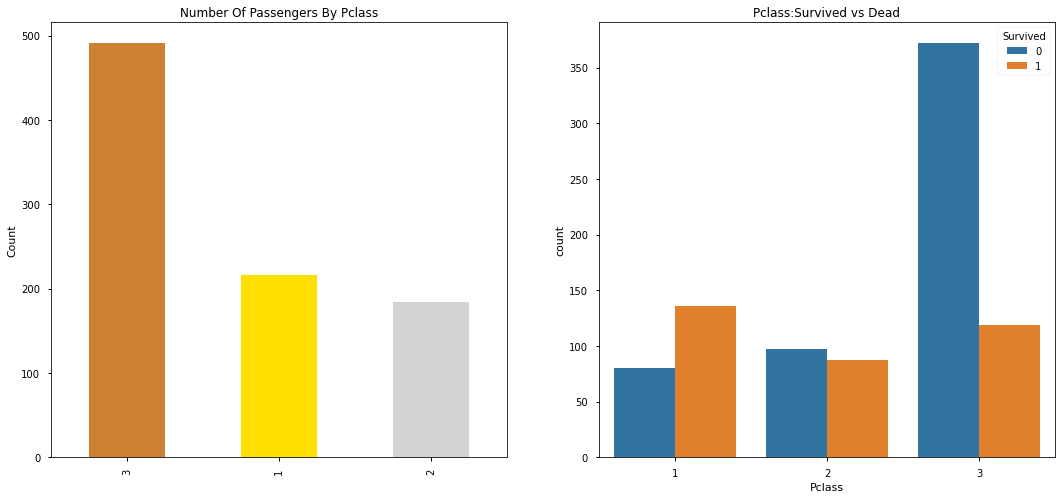

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. However, it is apparent that Pclass 1 passengers received top attention during the rescue. Despite the fact that Pclass 3 had a far larger number of passengers, their survival rate is still relatively low, around 25%.

Pclass 1 has a survival rate of roughly 63%, while Pclass 2 has a survival rate of around 48%. As a result, wealth and social standing are important. The world is very materialistic.

Let's go deeper and see what else we can find. Let's look at the survival rate by combining Sex and Pclass.

In [9]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


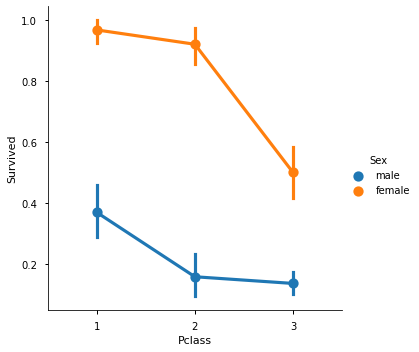

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In this example, we utilize FactorPlot because it is simple to separate categorical values.

We can clearly deduce from the CrossTab and FactorPlot that survival for Women from Pclass1 is around 95-96 percent, as just 3 out of 94 Women from Pclass1 perished.

Women were clearly given top consideration during rescue, regardless of Pclass. Even Pclass1 men have a dismal rate of survival.

Pclass appears to be a significant element as well. Let's look at some more features.

## Age--> Continous Feature

In [11]:
print('Oldest Passenger was ',df_train['Age'].max(),'Years old')
print('Youngest Passenger was ',df_train['Age'].min(),'Years')
print('Average passenger Age on board was ',round(df_train['Age'].mean(),),'Years')

Oldest Passenger was  80.0 Years old
Youngest Passenger was  0.42 Years
Average passenger Age on board was  30 Years


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

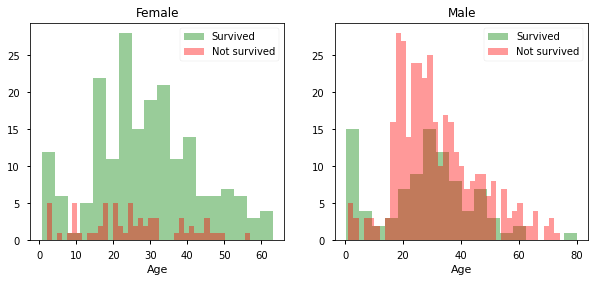

In [12]:
survived = 'Survived'
not_survived = 'Not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('Male')

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


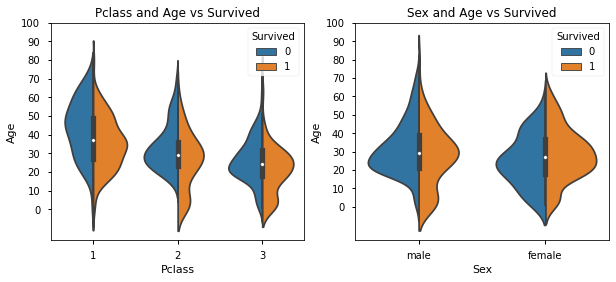

In [13]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1) The number of children grows with Pclass, and the survival rate for passengers under the age of ten (i.e. children) appears to be good regardless of Pclass.<br>
2) Passengers aged 20 to 50 from Pclass 1 have a good probability of surviving, and women have an even better chance.<br>
3) The chances of guys surviving reduce as they get older.

The Age feature has 177 null values, as we saw earlier. We can apply the dataset's mean age to these NaN values to replace them.

However, there were numerous people of various ages present. We just cannot assign a 4-year-old with a mean age of 29 years. Is there any way to figure out what age group the traveler belongs to?

We may now examine the Name feature. We can observe from the feature that the names have a salutation such as Mr or Mrs. As a result, we can allocate Mr. and Mrs.'s mean values to their respective groups.

### SibSip-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [14]:
pd.crosstab([df_train.SibSp],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [15]:
pd.crosstab(df_train.SibSp,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations:


If I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is surprisingly low. The reason might be Pclass??

In this case yes it's **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## Correlation between features

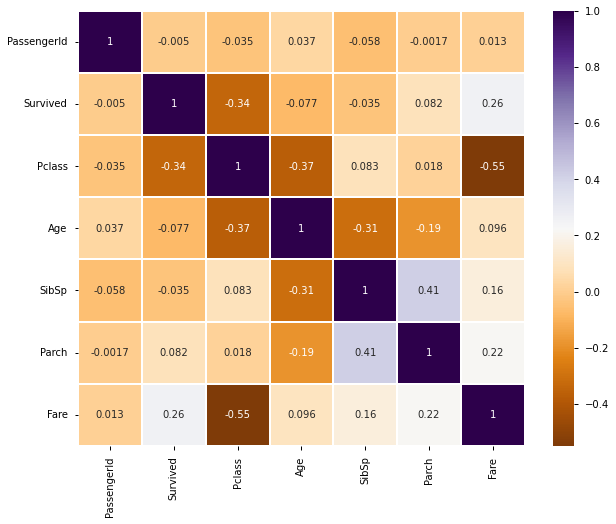

In [16]:
sns.heatmap(df_train.corr(),annot=True,cmap='PuOr',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Feature Engineering

### Filling NaN Ages

In [17]:
## Assigning the NaN Values with the Ceil values of the mean & std ages
data = [df_train, df_test]
for dataset in data:
    mean = df_train["Age"].mean()
    std = df_train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
    
print('Number of null vales in Age is:',df_train["Age"].isnull().sum())

Number of null vales in Age is: 0


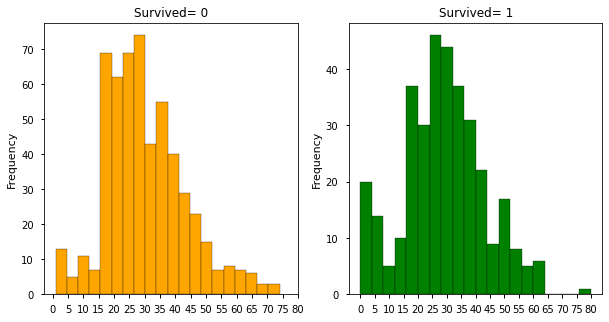

In [18]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='orange')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations:<br>
1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).<br>
2) The oldest Passenger was saved(80 years).<br>
3) Maximum number of deaths were in the age group of 30-40.

### Embarked--> Categorical Feature

In [19]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


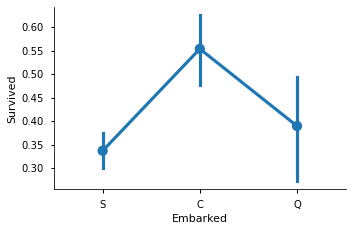

In [20]:
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\si

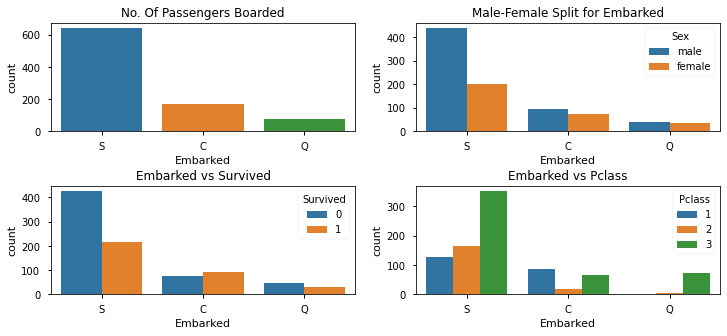

In [21]:
f,ax=plt.subplots(2,2,figsize=(12,5))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) The maximum number of passengers boarded from S. The majority of them are Pclass3 students.<br>
2) The passengers from C appear to be fortunate, as a large number of them survived. The rescue of all Pclass1 and Pclass2 passengers could be the explanation for this.<br>
3) The Embark S looks towards the port where the majority of the wealthy departed. Even yet, the odds of survival are slim, as many people from Pclass 3 perished (approximately 81 percent).<br>
4) Passengers from Pclass3 made up over 95% of the passengers at Port Q.

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


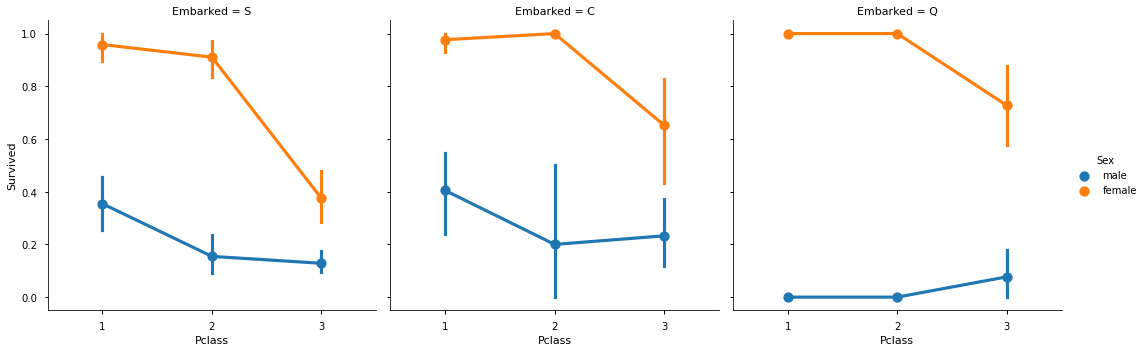

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show()

Observations:<br>1) Women's survival prospects for Pclass1 and Pclass2 are nearly equal regardless of Pclass.<br>
2) Port S appears to be unlucky for Pclass3 passengers, with an extremely low survival percentage for both men and women.
(Money Is Everything)<br>
3) Port Q appears to be unlucky for men, as practically everyone was from Pclass 3.

## Feature Engineering and Data Cleaning

### Filling Embarked NaN<br>
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [23]:
df_train['Embarked'].fillna('S',inplace=True)
df_train.Embarked.isnull().any()

False

In [24]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

print("Succesfully transformed Embarked feature")

Succesfully transformed Embarked feature


In [25]:
df_train['Embarked'].describe()

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

### Droping Features

In [26]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [27]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [28]:
df_train = df_train.drop(['PassengerId'], axis=1)
df_test = df_test.drop(['PassengerId'], axis=1)

In [29]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

print("Succesfully transformed Gender feature")

Succesfully transformed Gender feature


In [30]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [31]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)
print("Succesfully transformed Cabin feature")

Succesfully transformed Cabin feature


In [32]:
for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
print("Succesfully transformed Cabin feature, with null value of",df_train["Age"].isnull().sum())

Succesfully transformed Cabin feature, with null value of 0


### Name

In [33]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
print("Succesfully transformed Name feature")

Succesfully transformed Name feature


In [34]:
genders = {"male": 0, "female": 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

print("Succesfully transformed Gender feature")

Succesfully transformed Gender feature


In [35]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    
print("Succesfully transformed Fare features null vales and type")

Succesfully transformed Fare features null vales and type


In [36]:
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

print("Succesfully transformed Fare feature")

Succesfully transformed Fare feature


In [37]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

print("Succesfully transformed Age feature")

Succesfully transformed Age feature


In [38]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

print('Succesfully appended Age_Class feature')

Succesfully appended Age_Class feature


In [39]:
data = [df_train, df_test]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
print('Succesfully appended Fare_Per_Person feature')

Succesfully appended Fare_Per_Person feature


In [40]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,2,0,0,1,2,0,1,8,1,6,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


## Predictive Modeling

In [41]:
from sklearn import svm #support vector Machine
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
print('successfully imported the libraries for the models that we will use')

successfully imported the libraries for the models that we will use


### Training and Testing Split from the Train_Titanic

In [42]:
train,test=train_test_split(df_train,test_size=0.3,random_state=0,stratify=df_train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df_train[df_train.columns[1:]]
Y=df_train['Survived']
print('successfully splited the training and test set')

successfully splited the training and test set


### Linear Support Vector Machine(linear-SVM)

In [43]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',round(metrics.accuracy_score(prediction2,test_Y)*100,2),'%')

Accuracy for linear SVM is 82.09 %


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Using the linear support vector machine we have achieved 82.09% of accuracy

### Radial Support Vector Machines(rbf-SVM)

In [44]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',round(metrics.accuracy_score(prediction1,test_Y)*100,2),'%')

Accuracy for rbf SVM is  83.96 %


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Using the radial support vector machine we have achieved 83.96% of accuracy

### Decision Tree Classifier

In [45]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',round(metrics.accuracy_score(prediction4,test_Y)*100,2),'%')

The accuracy of the Decision Tree is 79.85 %


#### Using the decision tree classifier we have achieved 79.85% of accuracy

### Cross Validation

Here we are implementing the cross validation method for the models that we have used. 

In [46]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers = ['Linear Svm','Radial Svm','Decision Tree']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.809288,0.046099
Radial Svm,0.818265,0.052000
Decision Tree,0.795793,0.039439


#### The result for decision tree is slightly better after cross validation but the other two model performance decreased after doing cross validation.

<AxesSubplot:>

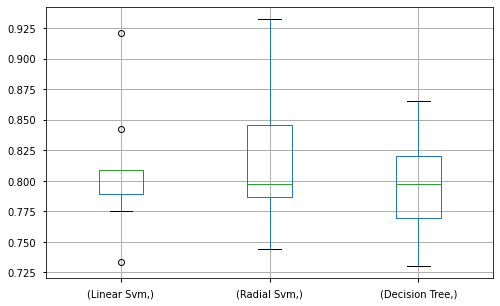

In [47]:
plt.subplots(figsize=(8,5))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

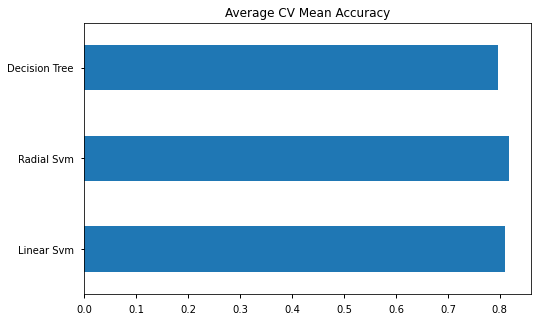

In [48]:
new_models_dataframe2['CV Mean'].plot.barh(width=.5)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### After using three models we come to the conclusion that the Redial Support Vector Machine has the highest accuracy of prediction using cross validation! 